In [51]:
import pandas as pd
import numpy as np
import json
import sys
from yahoo_oauth import OAuth2
from json import dumps
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib inline

[2022-09-20 20:19:50,020 DEBUG] [matplotlib.pyplot.pyplot.switch_backend] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2022-09-20 20:19:50,020 DEBUG] [matplotlib.pyplot.pyplot.switch_backend] Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [52]:
# import dictionary of Yahoo Manager Names to Real Life Nicknames
with open('../teams/team_mapping_initials.txt', 'r') as f:
    dict_init = dict(eval(f.read()))
with open('../teams/team_mapping_full.txt', 'r') as f:
    dict_full = dict(eval(f.read()))
    
#Need to create mapping between Real Name and Initials, in form of new dictionary
dict_full_init = {}
for name in dict_full:
    dict_full_init[dict_full[name]] = dict_init[name]
    
# names--> manager initials
#names = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

weeks = ['wk_1', 'wk_2', 'wk_3', 'wk_4', 'wk_5', 'wk_6', 'wk_7', 'wk_8',
         'wk_9', 'wk_10', 'wk_11', 'wk_12', 'wk_13', 'wk_14', 'wk_15', 'wk_16']

In [53]:
week = 1
df_total_scores = pd.DataFrame()
df_total_scores = pd.DataFrame(columns=weeks)
for week in range(1,17):
    df_scores = pd.read_csv('./weekly_scores/wk_'+str(week)+'_scores.csv', index_col='Unnamed: 0')
    df_scores = df_scores.rename(columns=dict_full_init)
    
    week_id = 'wk_' + str(week)
    #df_total_scores[week_id] = pd.Series()
    positions = ['QB1', 'QB2',
            'WR1', 'WR2', 'WR3', 'WR4',
            'RB1', 'RB2', 'RB3',
            'TE1', 'TE2',
            'W/R',
            'K',
            'DEF']
    for manager in df_scores:
        df_total_scores.loc[manager, week_id] = df_scores.loc[positions, manager].sum()


In [54]:
#df_total_scores = df_total_scores.reset_index()
df_total_scores.replace(0, np.nan, inplace=True)
df_total_scores

,wk_1,wk_2,wk_3,wk_4,wk_5,wk_6,wk_7,wk_8,wk_9,wk_10,wk_11,wk_12,wk_13,wk_14,wk_15,wk_16
The Commish,205.56,185.75,256.29,186.15,189.66,188.82,183.95,155.28,204.15,169.79,197.73,116.83,155.31,166.28,180.62,151.41
Ben,140.22,194.52,167.77,203.9,231.01,194.01,189.39,221.48,172.12,164.57,155.43,174.47,169.92,182.16,256.57,192.14
Tom,172.13,152.09,142.57,122.18,218.24,185.76,110.42,170.96,183.61,150.95,120.92,131.48,155.13,162.32,110.91,109.36
Zach Nolan,183.39,123.98,181.66,172.83,187.61,187.53,135.18,159.43,138.07,161.42,159.58,150.95,137.21,151.42,124.98,118.54
Clark,170.75,230.1,197.59,210.25,236.71,164.73,160.06,203.79,175.77,187.51,215.11,212.05,143.9,214.29,185.21,212.88
EasyE,264.81,175.69,226.15,166.11,198.13,152.53,153.97,144.7,167.73,222.39,132.92,178.75,180.18,197.51,153.17,154.4
Wyatt Carl,188.53,190.09,148.88,147.11,170.46,147.43,159.79,172.55,185.86,186.79,149.95,166.37,161.53,162.3,229.66,189.95
Brannon,186.06,104.04,125.85,187.5,138.34,144.64,155.87,150.58,164.46,176.87,190.22,159.62,145.8,160.84,149.63,182.83


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


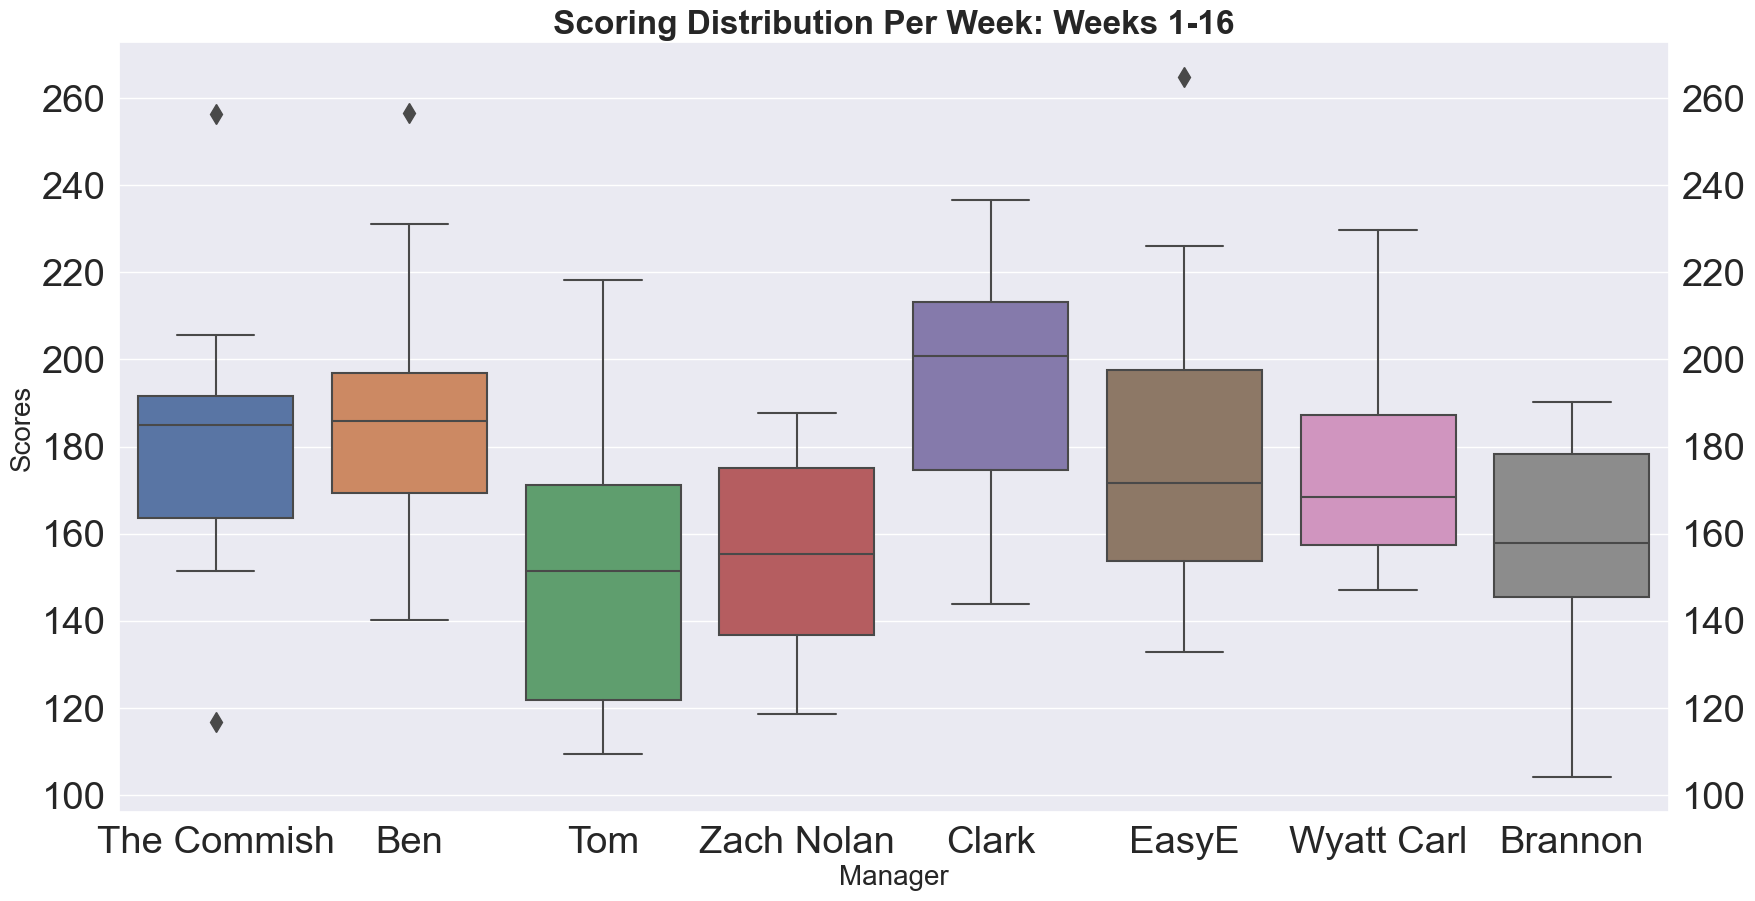

In [59]:

###################
week = 16
##################

fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.boxplot(data=data, 
                    
                    fliersize=10
                   )
ax.set_title("Scoring Distribution Per Week: Weeks 1-%s" % (week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.show(fig)


/var/folders/r2/5hpqmwfn5yb86z6c3vgpqkxc0000gn/T/ipykernel_97650/3530807417.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=data,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


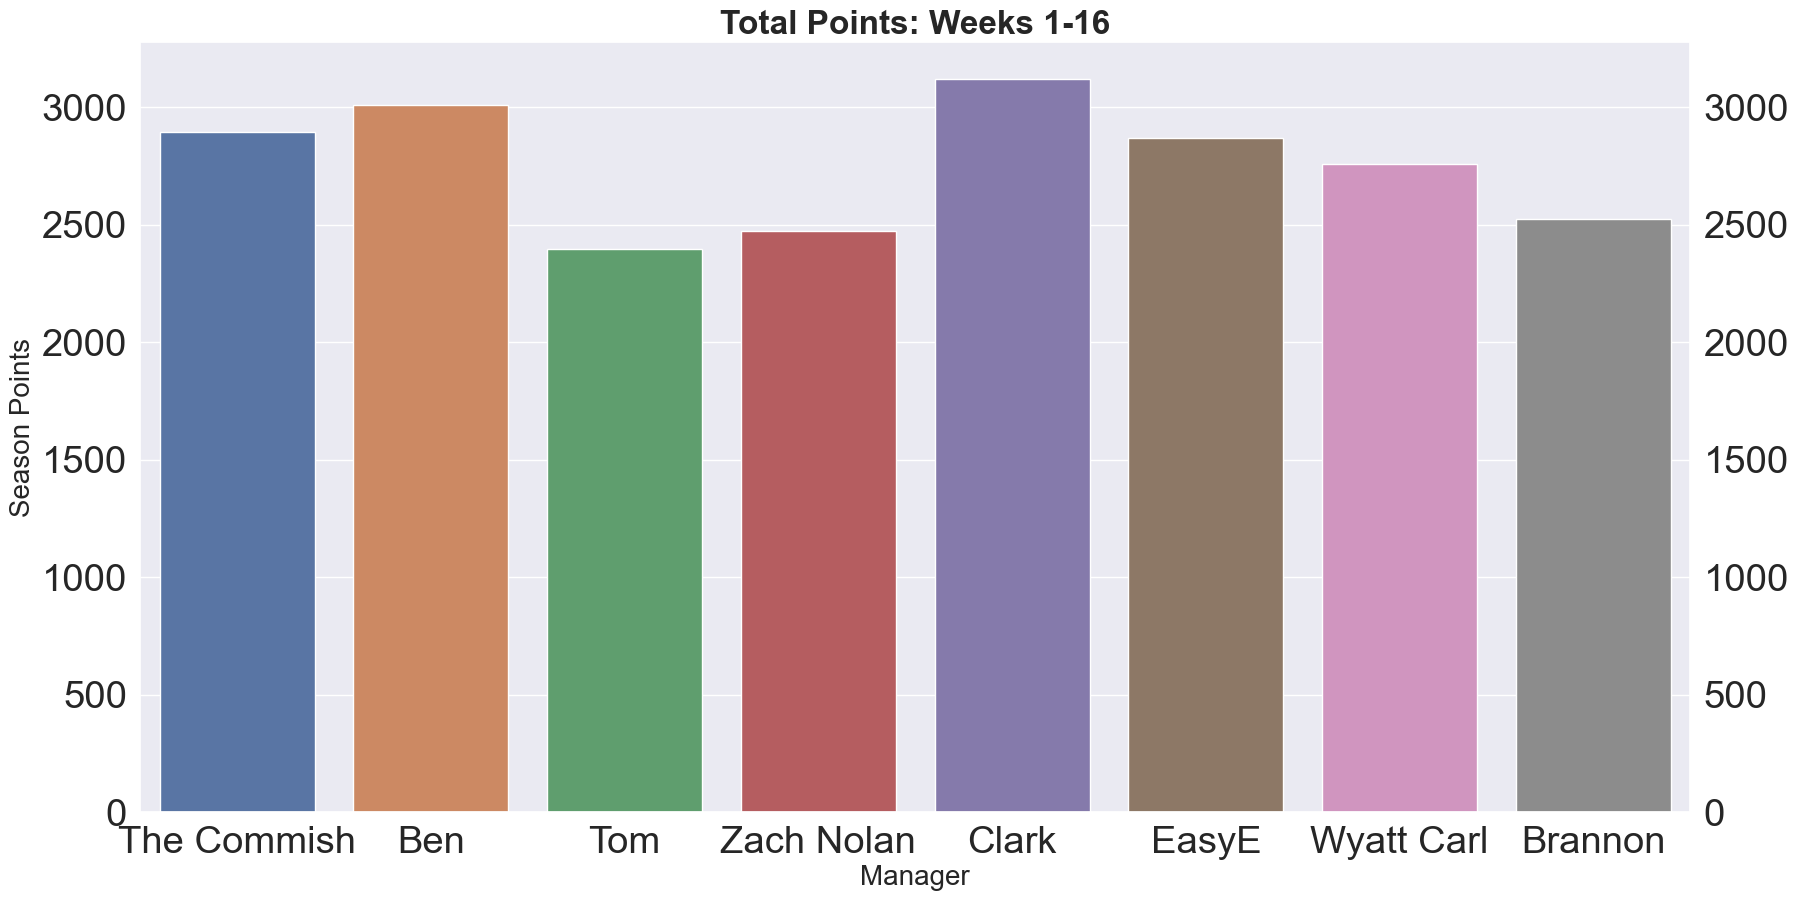

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.barplot(data=data, 
                    estimator=sum,
                    ci=None
                   )
ax.set_title("Total Points: Weeks 1-%s" %(week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Season Points", fontsize=20)
plt.show(fig)

/var/folders/r2/5hpqmwfn5yb86z6c3vgpqkxc0000gn/T/ipykernel_97650/3855475259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=data,


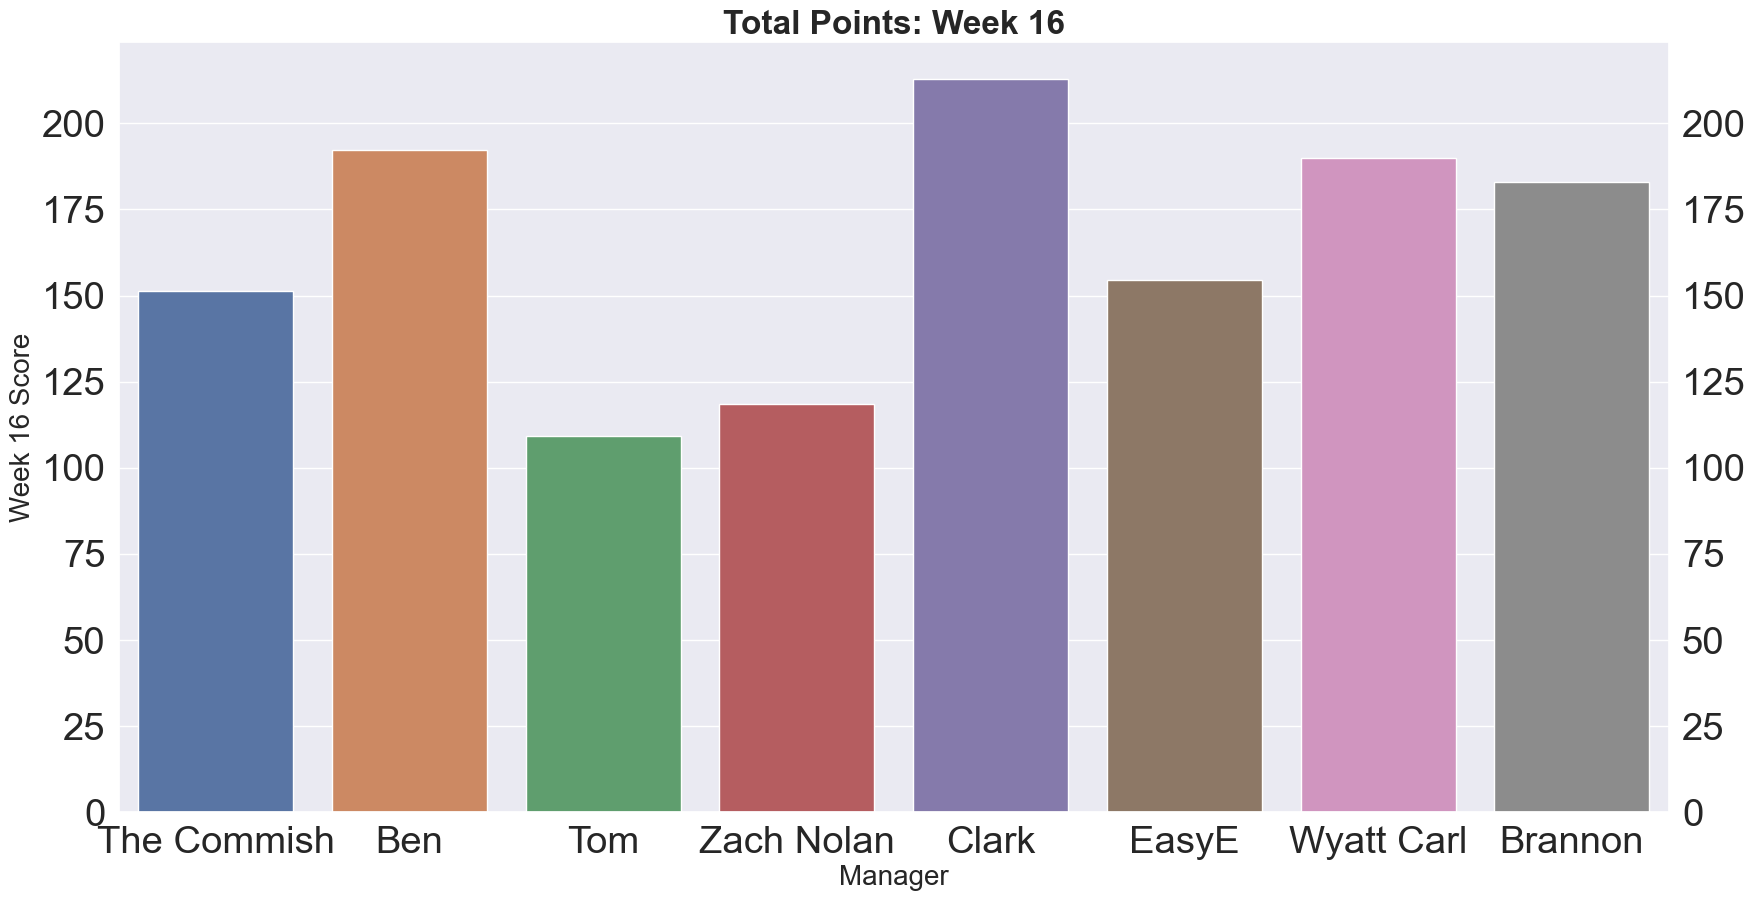

In [63]:


fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.reset_index()
graph = sns.barplot(data=data, 
                
                    #estimator=sum,
                    y='wk_16',
                    x='index',
                    ci=None,
                    orient='v'
                   )
ax.set_title("Total Points: Week %s" %(week),
             fontsize = 24, 
             fontweight="bold")
data = df_total_scores.T

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Week %s Score" %(week), fontsize=20)
plt.show(fig)